Trong OpenCV, có hai thuật toán inpainting dựa trên patch được sử dụng phổ biến, đó là:

- cv2.INPAINT_TELEA: Thuật toán này dựa trên phương pháp kết quả khớp cục bộ.
- cv2.INPAINT_NS: Thuật toán này dựa trên phương pháp Navier-Stokes.




Thuật toán cv2.INPAINT_TELEA hoạt động bằng cách tìm các patch có độ tương đồng cao nhất với vùng ảnh bị lỗi trong một khu vực cục bộ.

Dưới đây là một số bước hoạt động của thuật toán cv2.INPAINT_TELEA:

1. Đầu tiên, xác định vùng ảnh bị lỗi.
2. Tiếp theo, tìm các patch có độ tương đồng cao nhất với vùng ảnh bị lỗi trong một khu vực cục bộ.
3. Cuối cùng, sử dụng các patch đã tìm được để điền vào vùng ảnh bị lỗi.

Để tính toán độ tương đồng giữa hai patch, thuật toán cv2.INPAINT_TELEA sử dụng một hàm trọng số. Hàm trọng số này được tính toán dựa trên độ tương đồng về màu sắc và độ tương đồng về kết cấu giữa hai patch.


Thuật toán cv2.INPAINT_NS hoạt động bằng cách sử dụng phương pháp Navier-Stokes để tạo ra một mô hình lỏng cho vùng ảnh bị lỗi.

 Trong phương pháp này, các điểm trong mô hình lỏng được coi là các hạt chất lỏng. Các hạt chất lỏng này sẽ di chuyển và va chạm với nhau theo các quy luật vật lý.

Các quy luật vật lý này được mô tả bằng phương trình Navier-Stokes. Phương trình Navier-Stokes là một hệ phương trình vi phân.

Để giải hệ phương trình này, thuật toán cv2.INPAINT_NS sử dụng phương pháp Runge-Kutta. Phương pháp Runge-Kutta là một phương pháp giải hệ phương trình vi phân.

Để tạo mô hình lỏng, thuật toán cv2.INPAINT_NS sử dụng các bước sau:

1. Khởi tạo giá trị của tất cả các điểm trong mô hình lỏng bằng giá trị của các pixel không bị lỗi trong vùng ảnh bị lỗi.
2. Sử dụng phương pháp Navier-Stokes để tính toán chuyển động của các điểm trong mô hình lỏng.
3. Lặp lại bước 2 cho đến khi mô hình lỏng ổn định.

**Phát hiện vùng ảnh bị lỗi**

Để phát hiện vùng ảnh bị lỗi ta có thể sử dụng GIMP tool hoặc sử dụng mask tạo bởi ngưỡng threshold trong đó các pixel khác màu đen chuyển thành màu đen còn tất cả pixel màu đen (pixel bị lỗi) chuyển thành màu trắng

In [1]:
import cv2
import matplotlib.pyplot as plt


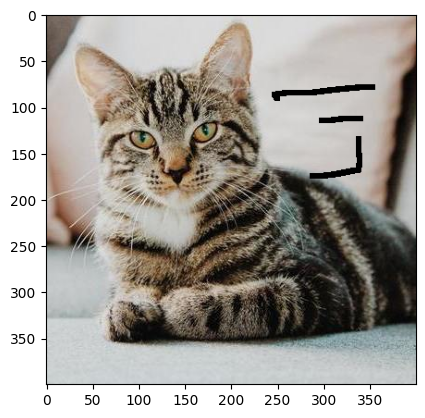

In [2]:
damaged_img = cv2.imread('/content/drive/MyDrive/OpenCV/Photos/cat_damaged.png')
plt.imshow(damaged_img[:,:,::-1])

In [8]:
# get the shape of the image
height, width = damaged_img.shape[0], damaged_img.shape[1]
mask = damaged_img.copy()
# Converting all pixels greater than zero to black while black becomes white
for i in range(height):
    for j in range(width):
        if mask[i, j].sum() > 0:
            mask[i, j] = 0
        else:
            mask[i, j] = [255, 255, 255]

In [11]:
mask.shape

(400, 400, 3)

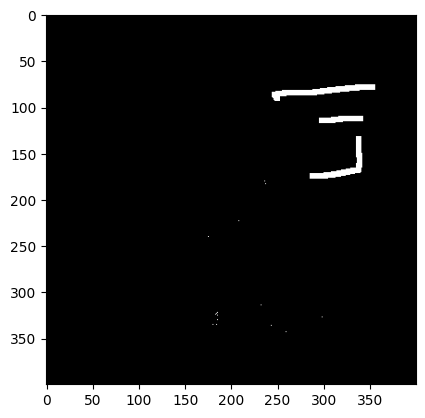

In [12]:
plt.imshow(mask[:,:,::-1])

mask needed to be converted to gray

In [13]:
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

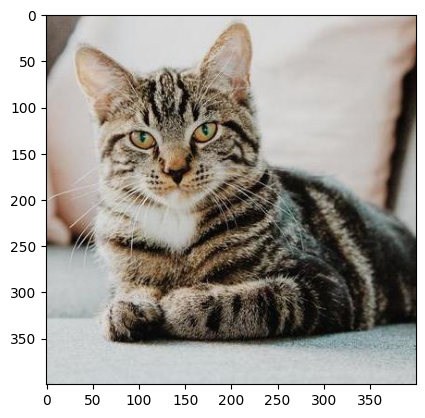

In [14]:
target = cv2.inpaint(damaged_img, mask, 3, cv2.INPAINT_NS)
plt.imshow(target[:,:,::-1])

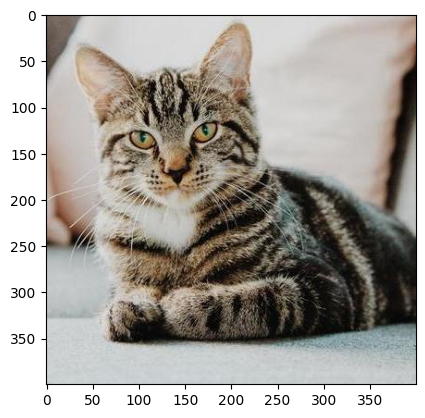

In [15]:
target = cv2.inpaint(damaged_img, mask, 3, cv2.INPAINT_TELEA)
plt.imshow(target[:,:,::-1])